# Analysis of Boston Housing Data

In [1]:
library(MASS)

In [2]:
?Boston

Boston {MASS},R Documentation


In [3]:
dim(Boston)

[1] 506  14

In [4]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [5]:
options(repr.plot.height=5.5)

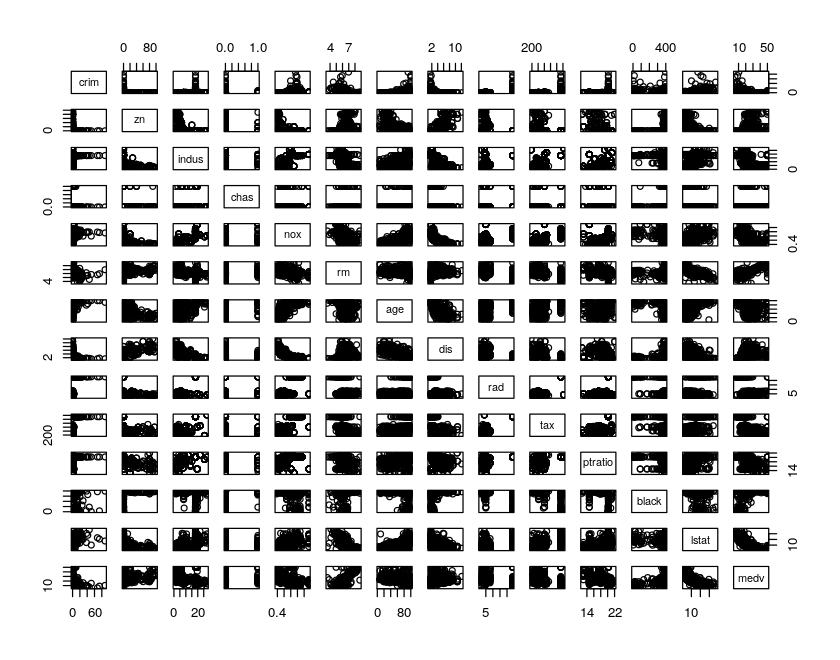

In [6]:
plot(Boston)

Make charles river indicator a categorical predictor

In [7]:
Boston$chas <- as.factor(Boston$chas)

In [8]:
summary(Boston)

      crim                zn             indus       chas         nox        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   0:471   Min.   :0.3850  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1: 35   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69           Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14           Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10           3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74           Max.   :0.8710  
       rm             age              dis              rad        
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   : 1.000  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.: 4.000  
 Median :6.208   Median : 77.50   Median : 3.207   Median : 5.000  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   Mean   : 9.549  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:24.000  
 Max.   :8.780   Max.   :100.00   Max.   :12.1

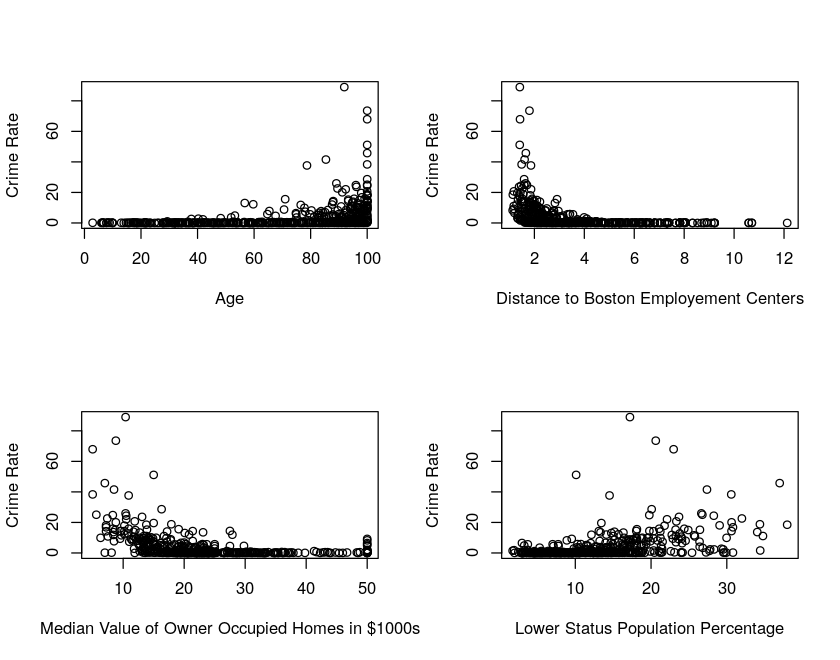

In [9]:
par(mfrow=c(2, 2))

plot(Boston$age, Boston$crim, xlab='Age', ylab='Crime Rate')
plot(Boston$dis, Boston$crim, xlab='Distance to Boston Employement Centers', ylab='Crime Rate')
plot(Boston$medv, Boston$crim, xlab='Median Value of Owner Occupied Homes in $1000s', ylab='Crime Rate')
plot(Boston$lstat, Boston$crim, xlab='Lower Status Population Percentage', ylab='Crime Rate')

par(mfrow=c(1, 1))

> Crime rate is very high when the distance to employement centers is smaller. Similarly, a lower status population percentage has a slight positive corelation with crime rate.

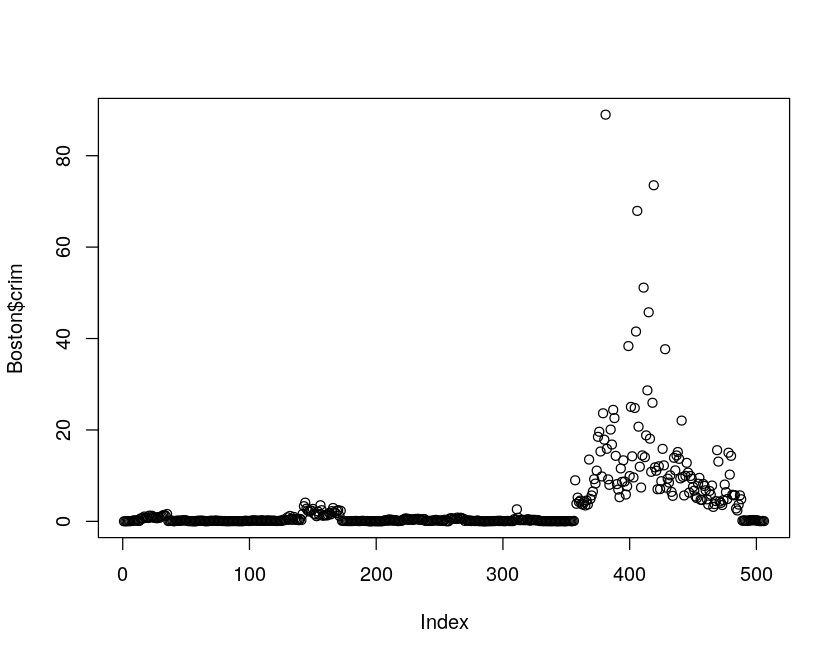

In [10]:
plot(Boston$crim)

See which area has maximum crime rate

In [11]:
Boston[which.max(Boston$crim), ]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
381,88.9762,0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.9,17.21,10.4


Top 5 areas with highest crime rates

In [12]:
Boston[order(Boston$crim, decreasing = T)[1:5], ]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
381,88.9762,0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
419,73.5341,0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
406,67.9208,0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
411,51.1358,0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
415,45.7461,0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0


In [13]:
range(Boston$crim)

[1]  0.00632 88.97620

Top 5 areas with highest tax rates

In [14]:
Boston[order(Boston$tax, decreasing = T)[1:5], ]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
489,0.15086,0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
490,0.18337,0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
491,0.20746,0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
492,0.10574,0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
493,0.11132,0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35,20.1


In [15]:
range(Boston$tax)

[1] 187 711

Top 5 areas with highest pupil-teacher ratio

In [16]:
Boston[order(Boston$ptratio, decreasing = T)[1:5], ]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
355,0.04301,80,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
356,0.10659,80,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6
128,0.25915,0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,392.11,17.19,16.2
129,0.32543,0,21.89,0,0.624,6.431,98.8,1.8125,4,437,21.2,396.90,15.39,18.0
130,0.88125,0,21.89,0,0.624,5.637,94.7,1.9799,4,437,21.2,396.90,18.34,14.3


In [17]:
range(Boston$ptratio)

[1] 12.6 22.0

Number of suburbs bound to Charles river

In [18]:
sum(Boston$chas == 1)

[1] 35

Another method

In [19]:
summary(Boston$chas)['1']

1 
35

Another method

In [20]:
table(Boston$chas)['1']

1 
35

Median pupil-teacher ratio

In [21]:
median(Boston$ptratio)

[1] 19.05

Suburb with lowest median value of owner occupied homes

In [22]:
Boston[which.min(Boston$medv), ]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
399,38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.9,30.59,5


> This suburb has a particularly high crime rate as well as lower status population percentage.

Number of suburbs where average number of rooms is 7 or more

In [23]:
sum(Boston$rm >= 7)

[1] 64

Number of suburbs where average number of rooms is 8 or more

In [24]:
sum(Boston$rm >= 8)

[1] 13

Summary of data for suburbs which average 8 or more rooms per dwelling

In [25]:
summary(Boston[Boston$rm >= 8, ])

      crim               zn            indus        chas        nox        
 Min.   :0.02009   Min.   : 0.00   Min.   : 2.680   0:11   Min.   :0.4161  
 1st Qu.:0.33147   1st Qu.: 0.00   1st Qu.: 3.970   1: 2   1st Qu.:0.5040  
 Median :0.52014   Median : 0.00   Median : 6.200          Median :0.5070  
 Mean   :0.71879   Mean   :13.62   Mean   : 7.078          Mean   :0.5392  
 3rd Qu.:0.57834   3rd Qu.:20.00   3rd Qu.: 6.200          3rd Qu.:0.6050  
 Max.   :3.47428   Max.   :95.00   Max.   :19.580          Max.   :0.7180  
       rm             age             dis             rad        
 Min.   :8.034   Min.   : 8.40   Min.   :1.801   Min.   : 2.000  
 1st Qu.:8.247   1st Qu.:70.40   1st Qu.:2.288   1st Qu.: 5.000  
 Median :8.297   Median :78.30   Median :2.894   Median : 7.000  
 Mean   :8.349   Mean   :71.54   Mean   :3.430   Mean   : 7.462  
 3rd Qu.:8.398   3rd Qu.:86.50   3rd Qu.:3.652   3rd Qu.: 8.000  
 Max.   :8.780   Max.   :93.90   Max.   :8.907   Max.   :24.000  
      

In [26]:
summary(Boston)

      crim                zn             indus       chas         nox        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   0:471   Min.   :0.3850  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1: 35   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69           Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14           Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10           3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74           Max.   :0.8710  
       rm             age              dis              rad        
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   : 1.000  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.: 4.000  
 Median :6.208   Median : 77.50   Median : 3.207   Median : 5.000  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   Mean   : 9.549  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:24.000  
 Max.   :8.780   Max.   :100.00   Max.   :12.1

> For suburbs with 8 or more average rooms per dwelling, the median crime rate is twice than that of the whole dataset. Also, the percentage of lower status population is very low. 

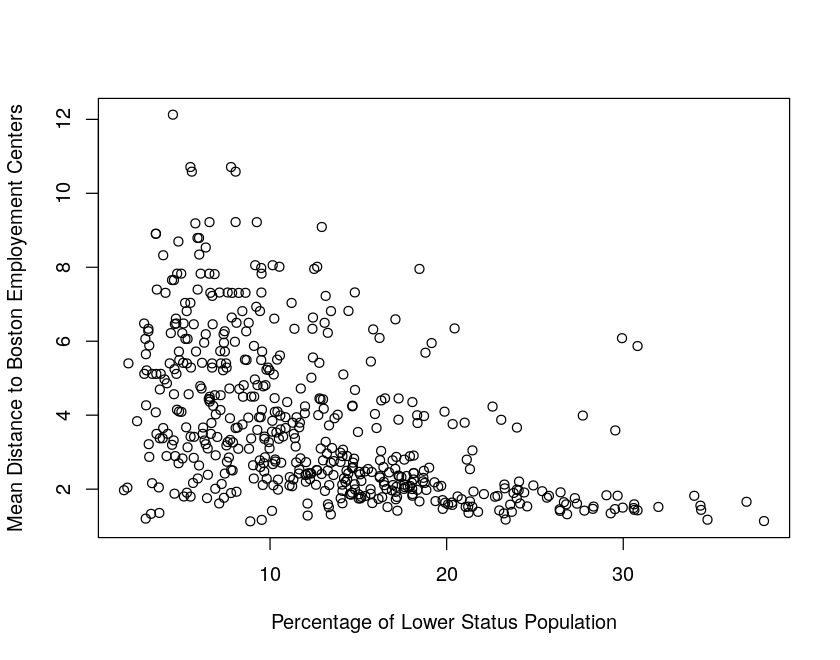

In [27]:
plot(Boston$lstat, Boston$dis,
     xlab='Percentage of Lower Status Population',
     ylab='Mean Distance to Boston Employement Centers')

> As the percentage of lower status population increases, the mean of distance to Boston employement centers decreases.

----

## Summary

- Crime rate is very high when the distance to employement centers is smaller. Similarly, a lower status population percentage has a slight positive corelation with crime rate.
- 35 suburbs bound the Charles river.
- The suburb with lowest median value of owner occupied homes has a particularly high crime rate as well as lower status population percentage.
- For suburbs with 8 or more average rooms per dwelling, the median crime rate is twice than that of the whole dataset. Also, the percentage of lower status population is very low. 
- As the percentage of lower status population increases, the mean of distance to Boston employement centers decreases.